In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [70]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
data = heart_disease.data

In [50]:
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [51]:
data.features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [52]:
data.targets.head()

,num
0,0
1,2
2,1
3,0
4,0


In [71]:
# 1. Handling missing data
# Identify rows with missing values
rows_with_na = data.features.isna().any(axis=1)

In [72]:
rows_with_na.sum()

6

In [73]:
# Remove these rows
data_features_cleaned = data.features[~rows_with_na].reset_index(drop=True)
data_targets_cleaned = data.targets[~rows_with_na].reset_index(drop=True)

In [74]:
data_features_cleaned.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [75]:
X = data_features_cleaned
y = data_targets_cleaned

In [76]:
# 2. Encoding categorical variables
# find categorical features with more than two unique values
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_features = [col for col in categorical_features if X[col].nunique() > 2]
print(categorical_features)

['cp', 'restecg', 'slope', 'thal']


In [77]:
X = pd.get_dummies(X, prefix=categorical_features, columns=categorical_features)

In [79]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67,1,160,286,0,108,1,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67,1,120,229,0,129,1,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [78]:
print(len(X.columns))

22


In [80]:
# 3. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(len(X_train), len(X_test))

237 60


In [82]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(y_train.shape, y_test.shape)

(237,) (60,)


Decision Tree

In [83]:
# The hyperparameters for decision tree
params = {
    'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
    # 'min_samples_leaf': [1, 2, 4, 8, 16],
}

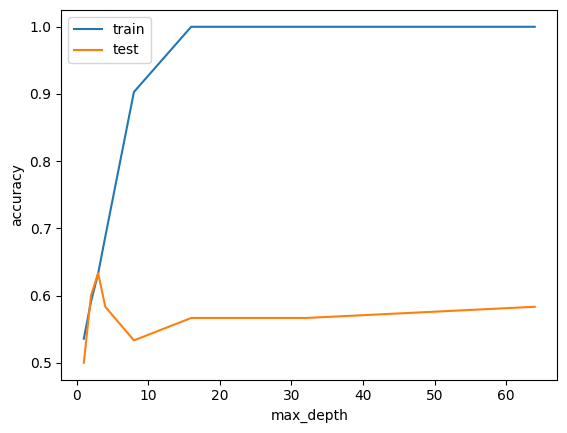

In [38]:
accuracy_train = []
accuracy_test = []
for max_depth in params['max_depth']:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
            
# plot the results
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.plot(params['max_depth'], accuracy_train, label='train')
plt.plot(params['max_depth'], accuracy_test, label='test')
plt.legend()

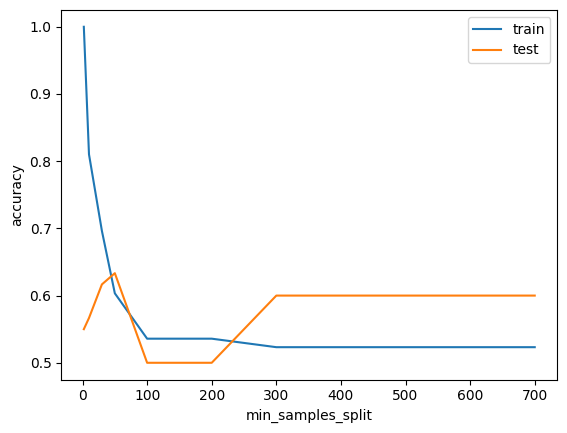

In [40]:
accuracy_train = []
accuracy_test = []
for min_samples_split in params['min_samples_split']:
    model = DecisionTreeClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
            
# plot the results
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.plot(params['min_samples_split'], accuracy_train, label='train')
plt.plot(params['min_samples_split'], accuracy_test, label='test')
plt.legend()

In [42]:
# The best model
max_depth = 3
min_samples_split = 50
model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.6033755274261603
Test accuracy: 0.6333333333333333


Random Forest

Note: All of the above hyperparameters can be used in random forest as well. In addition, there are other hyperparameters that are specific to random forest. For example, n_estimators is the number of trees in the forest. The larger the number of trees, the better the performance, but the longer the training time. Another hyperparameter is max_features, which is the number of features to consider when looking for the best split. The default value is sqrt(n_features), which is the square root of the number of features. This is a good default value, but it can be tuned.

In [32]:
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [3, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
}

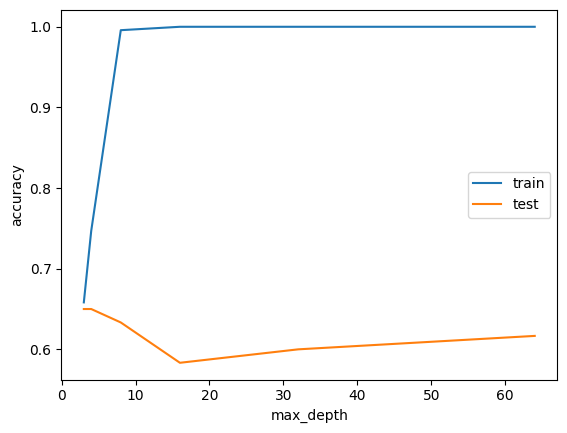

In [33]:
accuracy_train = []
accuracy_test = []
for max_depth in params['max_depth']:
    model = RandomForestClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
            
# plot the results
plt.plot(params['max_depth'], accuracy_train, label='train')
plt.plot(params['max_depth'], accuracy_test, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

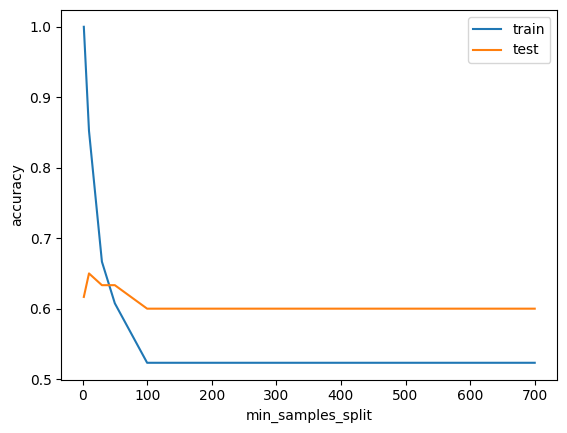

In [34]:
accuracy_train = []
accuracy_test = []
for min_samples_split in params['min_samples_split']:
    model = RandomForestClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
# plot the results
plt.plot(params['min_samples_split'], accuracy_train, label='train')
plt.plot(params['min_samples_split'], accuracy_test, label='test')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()

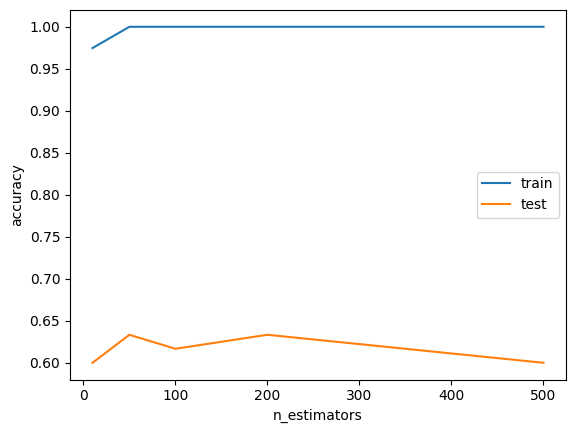

In [35]:
accuracy_train = []
accuracy_test = []
for n_estimators in params['n_estimators']:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    
# plot the results
plt.plot(params['n_estimators'], accuracy_train, label='train')
plt.plot(params['n_estimators'], accuracy_test, label='test')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

In [43]:
# The best model
n_estimators = 50
min_samples_split = 10
max_depth = 4
model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, max_depth=max_depth)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.729957805907173
Test accuracy: 0.6333333333333333


Note: There's another hyperparameter called n_jobs that can be used to parallelize the training process. Because in random forest each tree can be trained independently, we can train multiple trees at the same time. This can be done by setting n_jobs to the number of cores in the machine. However, this is not done here because the dataset is small and the training time is already very low.

Note: What we demonstrated here is a simple hyperparameter-by-hyperparameter search. However, we shouldn't overlook that this is a limited search space. In practice, we are looking for the best 'combination' of hyperparameters. This can be done using grid search or random search. We will demonstrate this in the next section.

XGBoost
--------
One interesting thing about the XGBoost is that it allows, during the fit, to pass a list evaluation datasets of the form (X_val,y_val), where on each iteration, it measures the cost (or evaluation metric) on the evaluation datasets so that once the cost (or metric) stops to descrease for a number of rounds (called early_stopping_rounds), the training will stop. This is how we can automatically control how many estimators is enough, and how we can avoid overfitting due to too many estimators.

In [84]:
n = int(len(X_train) * 0.8) # let's use 80% of the training data for training and 20% for validation

In [85]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

You can then set a large number of estimators, because you can stop if the cost function stops decreasing.

In [86]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, early_stopping_rounds=50)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-mlogloss:1.53785
[1]	validation_0-mlogloss:1.46781
[2]	validation_0-mlogloss:1.41472
[3]	validation_0-mlogloss:1.37330
[4]	validation_0-mlogloss:1.32167
[5]	validation_0-mlogloss:1.27439
[6]	validation_0-mlogloss:1.23491
[7]	validation_0-mlogloss:1.19873
[8]	validation_0-mlogloss:1.16586
[9]	validation_0-mlogloss:1.14244
[10]	validation_0-mlogloss:1.11446
[11]	validation_0-mlogloss:1.09619
[12]	validation_0-mlogloss:1.07603
[13]	validation_0-mlogloss:1.06054
[14]	validation_0-mlogloss:1.04340
[15]	validation_0-mlogloss:1.03047
[16]	validation_0-mlogloss:1.01760
[17]	validation_0-mlogloss:1.00663
[18]	validation_0-mlogloss:0.99398
[19]	validation_0-mlogloss:0.98675
[20]	validation_0-mlogloss:0.97761
[21]	validation_0-mlogloss:0.97149
[22]	validation_0-mlogloss:0.96405
[23]	validation_0-mlogloss:0.95812
[24]	validation_0-mlogloss:0.95330
[25]	validation_0-mlogloss:0.94845
[26]	validation_0-mlogloss:0.94690
[27]	validation_0-mlogloss:0.94626
[28]	validation_0-mlogloss:0.9

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

As you can see, even though you passed 500 estimators to fit, the algorithm only fitted 88 because the log-loss used to metrify the training rounds started to increase. In fact, the number of estimators is even less than 88. If you take a closer look to the metrics, you see that with 39 fitted trees, we achieved the minimum value of the log-loss, and in fact, this is the number of fitted trees in the final model:


In [87]:
xgb_model.best_iteration

39

In [88]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
print('Train accuracy:', accuracy_score(y_train, y_train_pred))
print('Test accuracy:', accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9240506329113924
Test accuracy: 0.5666666666666667


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)
  
# data (as pandas dataframes) 
data = heart_disease.data

In [2]:
# Identify rows with missing values
rows_with_na = data.features.isna().any(axis=1)
rows_with_na.sum()

6

In [3]:
# Remove these rows
data_features_cleaned = data.features[~rows_with_na].reset_index(drop=True)
data_targets_cleaned = data.targets[~rows_with_na].reset_index(drop=True)
data_features_cleaned.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [4]:
X = data_features_cleaned
y = data_targets_cleaned

In [6]:
import pandas as pd


# find categorical features with more than two unique values
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_features = [col for col in categorical_features if X[col].nunique() > 2]
print(categorical_features)
X = pd.get_dummies(X, prefix=categorical_features, columns=categorical_features)

['cp', 'restecg', 'slope', 'thal']


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(y_train.shape, y_test.shape)

(237,) (60,)


Feature Selection
-----------------------
Feature selection helps in reducing the dimensionality of the data by selecting the most important features. There are several methods to perform feature selection:

    Recursive Feature Elimination (RFE):
        This method recursively removes the least important features based on the model's feature importance until the desired number of features is reached.
    Feature Importance from Random Forest or XGBoost:
        You can train a Random Forest or XGBoost model and use the feature importance scores to select top features.

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# feature selection using RFE
model = RandomForestClassifier(n_estimators=50, min_samples_split=10, max_depth=4)
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

print(X_train_rfe.shape, X_test_rfe.shape)

(237, 10) (60, 10)


In [11]:
# print the selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_4',
       'thal_3.0', 'thal_7.0'],
      dtype='object')


Hyperparameter Tuning
-----------------------
Hyperparameter tuning is the process of finding the best hyperparameters for a model. There are two common methods to perform hyperparameter tuning:

    Grid Search:
        Grid search is an exhaustive search over a specified parameter grid. It evaluates all possible combinations of hyperparameters and returns the best one.
    Random Search:
        Random search is a method that randomly samples hyperparameters from a specified distribution. It evaluates a fixed number of random combinations and returns the best one. It often is more efficient when the search space is large.

In [96]:
from sklearn.model_selection import GridSearchCV


# Decision Tree
param_grid_dt = {
    'max_depth': [1, 2, 3, 4, 8, 16, 32, 64, None],
    'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],
    'min_samples_leaf': [1, 2, 4, 8, 16],
}
dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_rfe, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best parameters for Decision Tree: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [98]:
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rfe, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [99]:
# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_rfe, y_train)
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [101]:
from sklearn.metrics import classification_report


# Evaluate the models
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Predictions and Evaluation
y_pred_dt = best_dt.predict(X_test_rfe)
y_pred_rf = best_rf.predict(X_test_rfe)
y_pred_xgb = best_xgb.predict(X_test_rfe)

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, zero_division=0))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84        36
           1       0.00      0.00      0.00         9
           2       0.08      0.20      0.11         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.16      0.23      0.19        60
weighted avg       0.45      0.60      0.52        60

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        36
           1       0.00      0.00      0.00         9
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.25      0.24      0.23        60
w

In [12]:
# feature selection using feature importance
import numpy as np
from xgboost import XGBClassifier


# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=3)
xgb.fit(X_train, y_train)
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features = X.columns[indices[:10]]
print(selected_features)

Index(['ca', 'thal_3.0', 'cp_4', 'thal_7.0', 'exang', 'thalach', 'age', 'sex',
       'fbs', 'oldpeak'],
      dtype='object')


In [13]:
X_train_fi = X_train[selected_features]
X_test_fi = X_test[selected_features]

In [16]:
# evaluate the model
from sklearn.metrics import accuracy_score


xgb.fit(X_train_fi, y_train)
y_pred_xgb = xgb.predict(X_test_fi)
print('Test accuracy:', accuracy_score(y_test, y_pred_xgb))

Test accuracy: 0.6666666666666666


In [ ]:
# todo: try categorizing the target to achieve better accuracy